# Some comments regarding last week

## (Geo)Pandas merge

Merging is used to combine two DataFrames based on the entries of a certain column, or the index. 

### Pandas merge

In [1]:
import pandas as pd

In [2]:
# df1 contains countries, their capital, and their number of inhabitants
df1 = pd.DataFrame()  
df1["Country"]  = ["UK", "France", "Spain"]
df1["Capital"] = ["London", "Paris", "Madrid"]
df1["Inhabitants Country in Mio"] = [67.22, 67.39, 47.35]
df1

,Country,Capital,Inhabitants Country in Mio
0,UK,London,67.22
1,France,Paris,67.39
2,Spain,Madrid,47.35


In [3]:
# df2 contains countries, their capital, and their number of inhabitants
df2 = pd.DataFrame()  
df2["Capital"] = ["London", "Paris", "Berlin", "Rome"]
df2["Spoken Language"]  = ["English", "French", "German", "Italian"]
df2


,Capital,Spoken Language
0,London,English
1,Paris,French
2,Berlin,German
3,Rome,Italian


In [4]:
df1.merge(df2, how='left', on='Capital')

,Country,Capital,Inhabitants Country in Mio,Spoken Language
0,UK,London,67.22,English
1,France,Paris,67.39,French
2,Spain,Madrid,47.35,NaN


In [5]:
df1.merge(df2, how='right', on='Capital')

,Country,Capital,Inhabitants Country in Mio,Spoken Language
0,UK,London,67.22,English
1,France,Paris,67.39,French
2,NaN,Berlin,NaN,German
3,NaN,Rome,NaN,Italian


### Geopandas merge

In [6]:
import pandas as pd
import geopandas as gpd
from sodapy import Socrata

client = Socrata("analisi.transparenciacatalunya.cat", None)

results = pd.DataFrame(client.get("q2sg-894k", limit=2000))
results

,data,any,duradasegons,diasetmana,mes,hora,llengua,comarca,ambitterritorial,provincia,...,xarxa_a,detallfamiliarpersonaquetruca,derivacio_b,xarxa_b,derivacio_c,xarxa_c,detallambit,emergencia,detallprofessional,relacioagressorambitlaboral
0,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T01:00:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T03:20:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T19:07:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T16:37:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T18:02:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T14:45:00.000,Castellà,Segrià,Ponent,Lleida,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T17:52:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,Germans o germanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T09:09:00.000,Castellà,Garraf,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T00:03:00.000,Castellà,Vallès Oriental,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
comarques = gpd.read_file('divisions-administratives-v2r1-comarques-1000000-20220801.shp', crs="EPSG:4326")
comarques

,CODICOMAR,NOMCOMAR,CAPCOMAR,AREAC5000,geometry
0,01,Alt Camp,Valls,537.6317,"POLYGON ((373020.449 4590188.741, 372482.744 4..."
1,02,Alt Empordà,Figueres,1356.6431,"MULTIPOLYGON (((513760.140 4662388.220, 513758..."
2,03,Alt Penedès,Vilafranca del Penedès,592.5498,"POLYGON ((386593.300 4595896.200, 388616.100 4..."
3,04,Alt Urgell,la Seu d'Urgell,1447.2028,"MULTIPOLYGON (((360800.100 4649174.000, 360624..."
4,05,Alta Ribagorça,el Pont de Suert,427.2234,"POLYGON ((327485.124 4721105.796, 327436.728 4..."
5,06,Anoia,Igualada,867.0471,"POLYGON ((371426.378 4628557.172, 372106.708 4..."
6,07,Bages,Manresa,1092.7982,"POLYGON ((417259.067 4646530.811, 417513.903 4..."
7,08,Baix Camp,Reus,696.4883,"MULTIPOLYGON (((335047.090 4547015.090, 335000..."
8,09,Baix Ebre,Tortosa,1001.9306,"MULTIPOLYGON (((311847.200 4514855.880, 311833..."
9,10,Baix Empordà,la Bisbal d'Empordà,701.1353,"MULTIPOLYGON (((498479.410 4622829.390, 498478..."


In [8]:
set(results.comarca) - set(comarques.NOMCOMAR)

{'Altres', 'No consta'}

In [9]:
set(comarques.NOMCOMAR)- set(results.comarca)

{'Alta Ribagorça', 'Moianès', 'Pallars Jussà', 'Pallars Sobirà', 'Terra Alta'}

In [10]:
comarques.rename(columns = {'NOMCOMAR':'comarca'}, inplace = True)
merged_df = results.merge(comarques, how='left', on='comarca')
merged_gdf = gpd.GeoDataFrame(merged_df, geometry="geometry", crs="EPSG:4326")
merged_gdf

,data,any,duradasegons,diasetmana,mes,hora,llengua,comarca,ambitterritorial,provincia,...,derivacio_c,xarxa_c,detallambit,emergencia,detallprofessional,relacioagressorambitlaboral,CODICOMAR,CAPCOMAR,AREAC5000,geometry
0,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T01:00:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
1,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T03:20:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
2,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T19:07:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
3,2013-01-01T00:00:00.000,2013,Menys de 5 minuts,Dimarts,Gener,1899-12-31T16:37:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
4,2013-01-01T00:00:00.000,2013,Entre 5 i 15 minuts,Dimarts,Gener,1899-12-31T18:02:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T14:45:00.000,Castellà,Segrià,Ponent,Lleida,...,NaN,NaN,NaN,NaN,NaN,NaN,33,Lleida,1396.1161,"MULTIPOLYGON (((315175.836 4605775.825, 315121..."
1996,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T17:52:00.000,Castellà,Barcelonès,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,13,Barcelona,146.3935,"MULTIPOLYGON (((430781.151 4576638.077, 430763..."
1997,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T09:09:00.000,Castellà,Garraf,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,17,Vilanova i la Geltrú,185.2434,"MULTIPOLYGON (((386888.695 4561204.584, 386881..."
1998,2013-03-02T00:00:00.000,2013,Entre 5 i 15 minuts,Dissabte,Març,1899-12-31T00:03:00.000,Castellà,Vallès Oriental,Metropolità,Barcelona,...,NaN,NaN,NaN,NaN,NaN,NaN,41,Granollers,735.2397,"POLYGON ((448722.100 4628732.200, 449076.876 4..."


<AxesSubplot:>

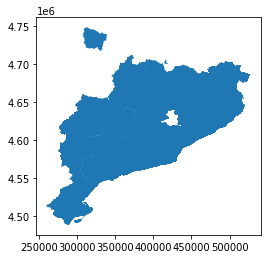

In [11]:
merged_gdf.plot()

<AxesSubplot:>

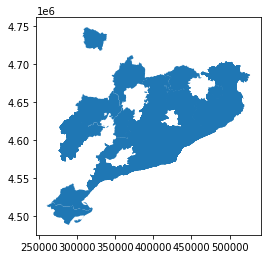

In [12]:
merged_gdf[merged_gdf["duradasegons"]=="Entre 15 i 30 minuts"].plot()

# Use list comprehension instead of for-loops

(where possible)

syntax: 
    
    newList = [ expression(element) for element in oldList if condition ] 
    
Example adapted from https://www.geeksforgeeks.org/python-list-comprehension/. 

In [13]:
# Import required module
import time
import numpy as np

n= 1000000

begin = time.time()
result = np.zeros(n)
for i in range(n):
    result[i] = i**2
end = time.time()
 
# Display time taken by for_loop()
print('Time taken for_loop:', round(end-begin, 2))

 
# Calculate time takens by list_comprehension()
begin = time.time()
result = np.array([i**2 for i in range(n)])
end = time.time()
 
# Display time taken by for_loop()
print('Time taken for list_comprehension:', round(end-begin, 2))

Time taken for_loop: 0.31
Time taken for list_comprehension: 0.26
